In [3]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from torchvision.datasets.utils import download_url
# URL of the directory
url = "https://lasco-www.nrl.navy.mil/lz/level_05/231001/c4/42609150.fts"

download_url(url, '.', '011023.fts')

100%|██████████| 2108160/2108160 [00:01<00:00, 1686381.01it/s]


In [1]:
start = '231010'
end = '231020'
interval_time(start, end, '%y%m%d')

NameError: name 'interval_time' is not defined

In [8]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from data.preprocessing import interval_time
import os
from torchvision.datasets.utils import download_url
#scrap date to YYMMDD
mode = 'c4'
dates = interval_time('231015', '231015', '%y%m%d')
dirctry = 'data/SOHO/LASCO/' + mode
os.makedirs(dirctry)
for date in dates:
    url = f"https://lasco-www.nrl.navy.mil/lz/level_05/{date}/{mode}/"

    # Open the URL and read the page content
    page = urlopen(url)
    html_content = page.read().decode('utf-8')

    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    for k, name in enumerate([i.text for i in soup.find_all('a')[6:-1] if '.jpg' not in i.text]):
        download_url(url+name, dirctry, date + '_' + str(k) + '.fts')
    

100%|██████████| 2108160/2108160 [00:01<00:00, 1785165.14it/s]


100%|██████████| 2108160/2108160 [00:01<00:00, 1520263.92it/s]


100%|██████████| 2108160/2108160 [00:01<00:00, 1776700.94it/s]


100%|██████████| 2108160/2108160 [00:01<00:00, 1787539.41it/s]


KeyboardInterrupt: 

In [9]:
for date in []:
    print(date)

In [5]:
from preprocessing import scrap_date_gen
scrap_date_gen('23072', '230808', input_mode = '%y%m%d', output_mode = )

['2023']

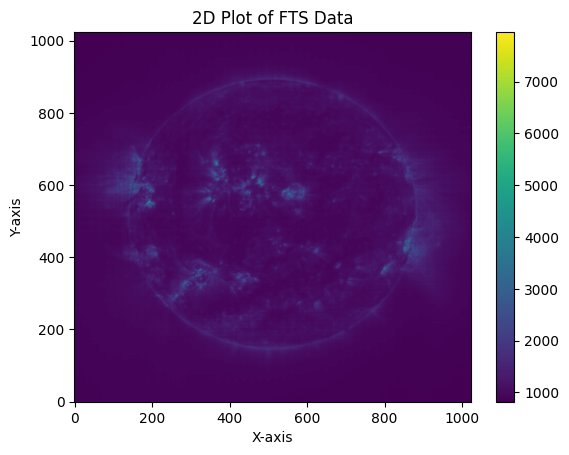

In [13]:
import matplotlib.pyplot as plt
data.shape
plt.imshow(data, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Plot of FTS Data')
plt.show()

# CELIAS SEM ATTEMPT

In [1]:
from data.preprocessing import SOHO, interval_time
data_creator = SOHO()
scrap_date = interval_time('19960101', '20231231')
celias_proton = data_creator.COSTEP_EPHIN(scrap_date)

/home/jenci/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using downloaded and verified file: ./data/SOHO_L2/COSTEP_EPHIN_5min/COSTEP_EPHIN_L3_l3i_5min-EntireMission-ByYear.tar.gz


In [2]:
celias_proton

,int_p4,int_p8,int_p25,int_p41,int_h4,int_h8,int_h25,int_h41
datetime,,,,,,,,
2014-01-01 00:00:00,0.102110,0.007767,0.000308,0.000151,0.000861,0.000000,0.0,0.0
2014-01-01 00:05:00,0.092772,0.006836,0.000445,0.000144,0.000861,0.000000,0.0,0.0
2014-01-01 00:10:00,0.101100,0.006177,0.000329,0.000212,0.000143,0.000000,0.0,0.0
2014-01-01 00:15:00,0.097624,0.006985,0.000088,0.000000,0.000574,0.000039,0.0,0.0
2014-01-01 00:20:00,0.096934,0.006251,0.000377,0.000202,0.000861,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-29 23:35:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2023-11-29 23:40:00,0.006043,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2023-11-29 23:45:00,0.018130,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [6]:
import pandas as pd
from astropy.time import Time
df = pd.read_csv('data/SOHO_L2/CELIAS_SEM_15sec_avg/data.csv')
julian_values = df['Julian'].values
datetime_values = Time(julian_values, format='jd').datetime
df['datetime'] = datetime_values
df = df.set_index('datetime', drop = True, inplace = True).drop('Julian', axis = 1).resample('5T').mean()
df.to_csv('data/SOHO_L2/CELIAS_SEM_15sec_avg/data.csv')

In [3]:
import pandas as pd
csv_root = './data/SOHO_L2/CELIAS_SEM_15sec_avg/data.csv'
celias_sem = pd.read_csv(csv_root)
celias_sem['datetime'] = pd.to_datetime(celias_sem['Julian'], unit='D', origin = 'julian')
celias_sem.set_index('datetime', drop=True,inplace=True)
celias_sem.drop('Julian', axis = 1, inplace = True)
celias_resample = celias_sem.resample('5T').mean()
celias_resample.to_csv(csv_root)